In [43]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"C:\Users\akhil.nair\Downloads\Zomato-data-.csv")

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [18]:
df["rate"]=df["rate"].str.split("/").str[0].astype(float)

### Average Rating

In [25]:
print("Average Rating:",st.mean(df["rate"]))

Average Rating: 3.6331081081081082


<Axes: xlabel='listed_in(type)', ylabel='count'>

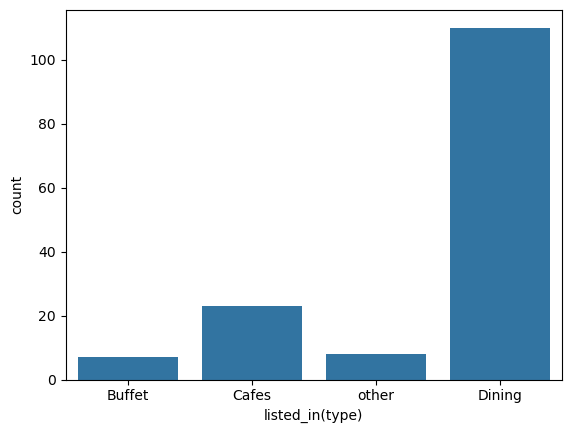

In [31]:
sns.color_palette("tab10",as_cmap=True)
sns.countplot(data=df,x="listed_in(type)")

#### Most of the restaurants are of Dining type

-----------------------


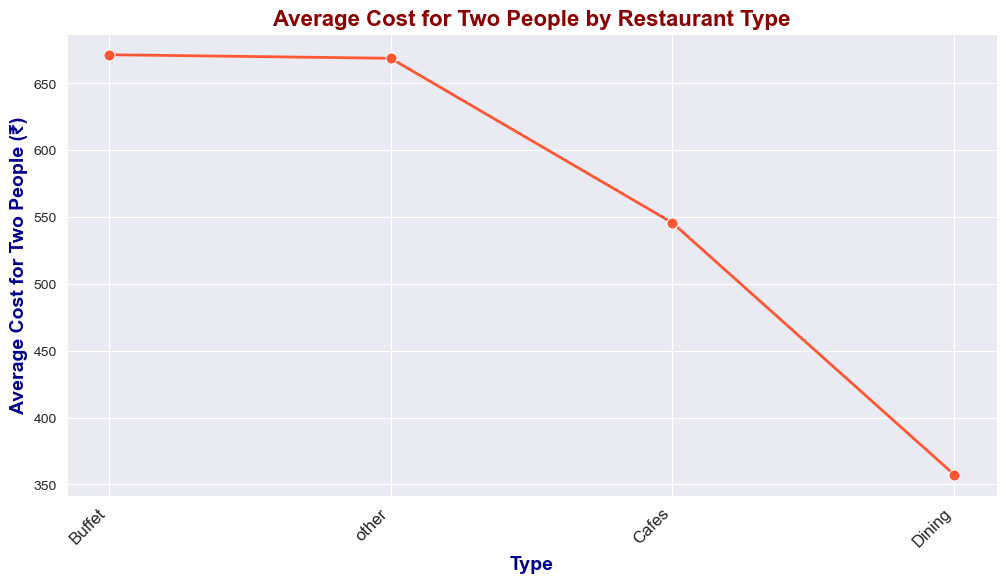

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert cost column to numeric (if needed)
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str).str.replace(",", "").astype(float)

# Aggregate: Compute average cost per type
df_grouped = df.groupby("listed_in(type)")["approx_cost(for two people)"].mean().reset_index()

# Sort values for better visualization
df_grouped = df_grouped.sort_values(by="approx_cost(for two people)", ascending=False)

# Set the style
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Line plot with markers
sns.lineplot(
    data=df_grouped, 
    x="listed_in(type)", 
    y="approx_cost(for two people)", 
    marker="o", 
    linewidth=2, 
    markersize=8, 
    color="#ff5733"
)

# Labels and title
plt.xlabel("Type", fontsize=14, fontweight="bold", color="darkblue")
plt.ylabel("Average Cost for Two People (₹)", fontsize=14, fontweight="bold", color="darkblue")
plt.title("Average Cost for Two People by Restaurant Type", fontsize=16, fontweight="bold", color="darkred")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.show()


##### In the above line chart we can notice that Buffet is the most expensive type of restaurant and Dining is the most affordable one

------------------------------------------

<Axes: xlabel='online_order', ylabel='count'>

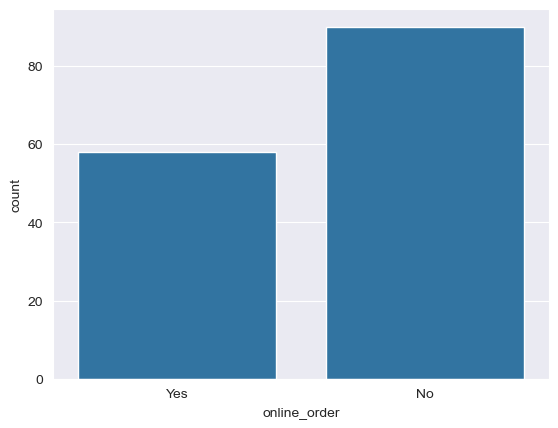

In [50]:
sns.countplot(data=df,x="online_order")

#### We can see that most of the restaurants do not accept online orders 

-----------------------------------------------

#### Restaurant with the highest number of votes

In [59]:
df[df["votes"]==df["votes"].max()]["name"]

38    Empire Restaurant
Name: name, dtype: object

----------------------------------------------

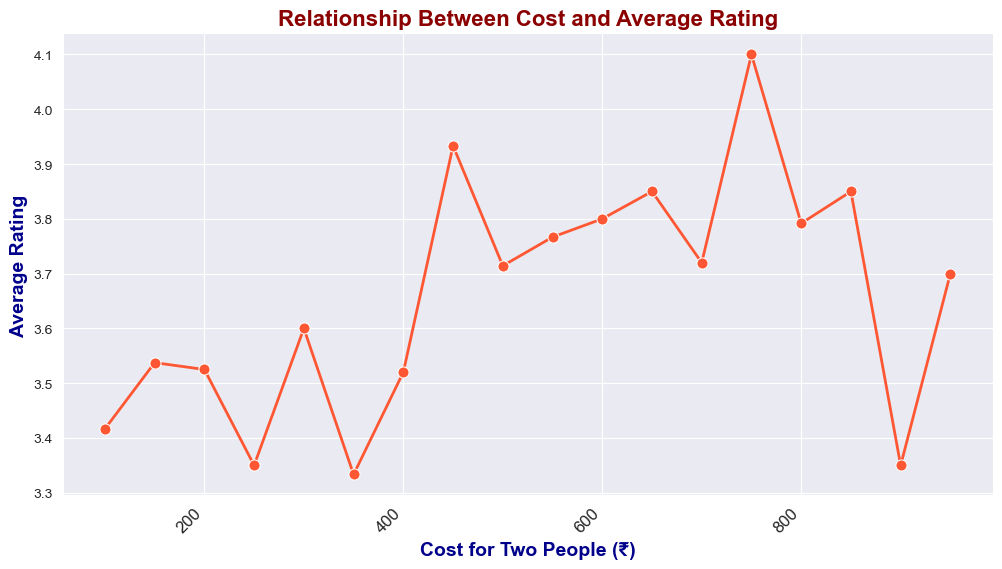

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert cost column to numeric (removing commas if present)
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str).str.replace(",", "").astype(float)

# Aggregate: Get the average rating per cost level
df_grouped = df.groupby("approx_cost(for two people)")["rate"].mean().reset_index()

# Set style and figure size
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Line plot with markers
sns.lineplot(
    data=df_grouped, 
    x="approx_cost(for two people)", 
    y="rate", 
    marker="o", 
    linewidth=2, 
    markersize=8, 
    color="#ff5733"
)

# Labels and title
plt.xlabel("Cost for Two People (₹)", fontsize=14, fontweight="bold", color="darkblue")
plt.ylabel("Average Rating", fontsize=14, fontweight="bold", color="darkblue")
plt.title("Relationship Between Cost and Average Rating", fontsize=16, fontweight="bold", color="darkred")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.show()


#### The highest rated restaurants are between 700-800 RS

-----------------------------------------------------------------

Text(0, 0.5, 'Avg rating')

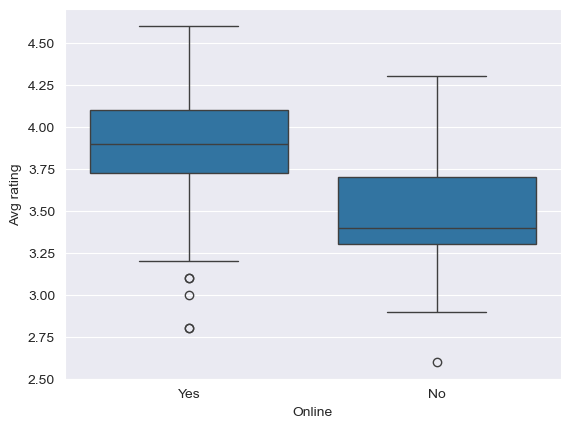

In [69]:
sns.boxplot(data=df,x="online_order",y="rate")
plt.xlabel("Online")
plt.ylabel("Avg rating")

#### Online orders are much higher rated as compared to offline orders 

------------------------------------------------------------

#### TOP 5 RESTAURANTS BY RATING 

In [87]:
top_5_restaurants = df.sort_values(by="rate", ascending=False).head(5)

top_5_restaurants[["name","rate","votes","approx_cost(for two people)","listed_in(type)"]]


,name,rate,votes,approx_cost(for two people),listed_in(type)
44,Onesta,4.6,2556,600.0,other
7,Onesta,4.6,2556,600.0,Cafes
38,Empire Restaurant,4.4,4884,750.0,other
86,Meghana Foods,4.4,4401,600.0,Dining
52,Corner House Ice Cream,4.3,345,400.0,Dining


C:\Users\akhil.nair\AppData\Local\Temp\ipykernel_14352\1623957541.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\akhil.nair\AppData\Local\Temp\ipykernel_14352\1623957541.py:17: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


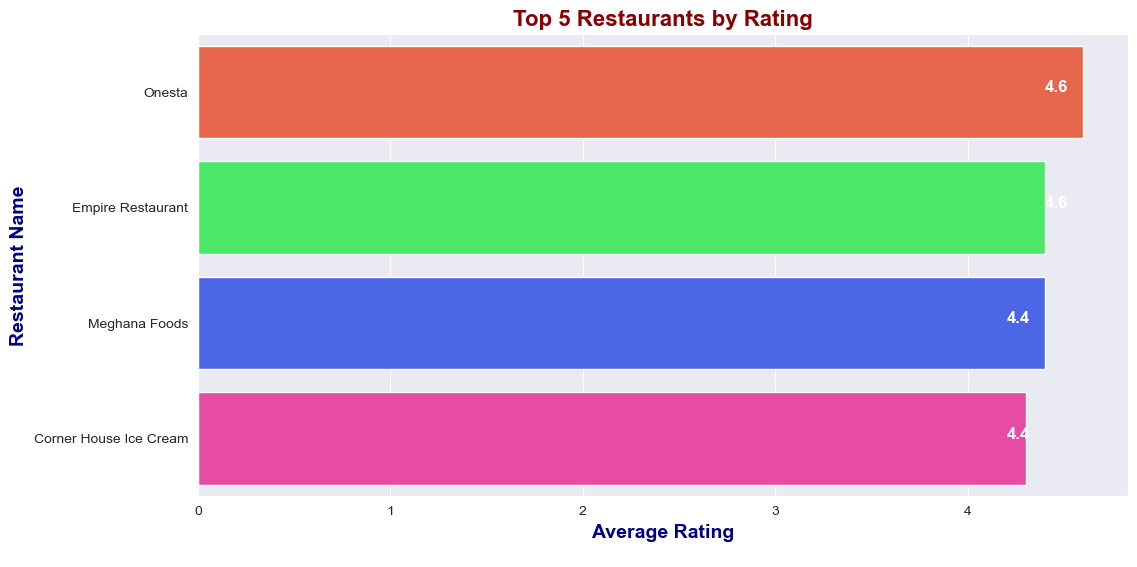

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'rate' to numeric (if it's stored as a string)
df["rate"] = pd.to_numeric(df["rate"], errors="coerce")

# Get the top 5 restaurants by rating
top_5_restaurants = df.sort_values(by="rate", ascending=False).head(5)

# Set style
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Bar plot with vibrant colors
colors = ["#ff5733", "#33ff57", "#3357ff", "#ff33a6", "#ffa533"]
sns.barplot(
    data=top_5_restaurants, 
    x="rate", 
    y="name", 
    palette=colors
)

# Add annotations (display rating values on bars)
for index, value in enumerate(top_5_restaurants["rate"]):
    plt.text(value - 0.2, index, f"{value:.1f}", fontsize=12, fontweight="bold", color="white")

# Labels and title
plt.xlabel("Average Rating", fontsize=14, fontweight="bold", color="darkblue")
plt.ylabel("Restaurant Name", fontsize=14, fontweight="bold", color="darkblue")
plt.title("Top 5 Restaurants by Rating", fontsize=16, fontweight="bold", color="darkred")

# Show the plot
plt.show()
